In [335]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## –––––––––––– OBTENCION Y REVISIÓN DE BASES DE DATOS ––––––––––––––

In [336]:
box1= "https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/boxoffice.csv"

boxoffice= pd.read_csv(box1)
boxoffice



,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997
...,...,...,...,...,...
15738,15739,Dog Eat Dog,IFC,80,2009
15739,15740,Paranoid Girls,NaN,78,2015
15740,15741,Confession of a Child of the Century,Cohen,74,2015
15741,15742,Storage 24,Magn.,72,2013


In [337]:
((boxoffice.isnull())|(boxoffice=="Unknown")).sum()

rank               0
title              1
studio            35
lifetime_gross     0
year               0
dtype: int64

No voy a analizar nada relativo a los estudios y productoras por lo que por ahora no me importan esos NaNs, y menos una cifra tan pequeña.

He revisado el del título y es que la película se llama Unknown!

In [338]:
movie= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/movies.csv"

movies = pd.read_csv(movie)
movies.shape

(4802, 24)

In [339]:
movies[movies['popularity']>5].isnull().sum()

index                      0
budget                     0
genres                     0
homepage                2120
id                         0
keywords                 102
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  306
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

Teniendo en cuenta que es una base de datos enorme, tiene peliculas de género independiente y producciones caseras que no me interesan en el análisis, por lo que, dentro de aquellas con un minimo de popularidad, no hay vacíos ni errores que me afecten en lo que voy a estudiar.

In [340]:
movies.drop(columns=['homepage','original_title','keywords','overview','cast','crew','tagline','production_companies','production_countries','spoken_languages'],inplace=True)


In [341]:
popmovies=movies[movies['popularity']>5]
popmovies.columns

Index(['index', 'budget', 'genres', 'id', 'original_language', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'director'],
      dtype='object')

In [342]:
popmovies.sort_values('release_date', ascending=False)

,index,budget,genres,id,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,director
3302,3302,8000000,Drama,374461,en,7.828459,2016-09-16,0,104.0,Released,Mr. Church,7.0,129,Bruce Beresford
4719,4720,8500000,Drama,339408,en,9.452808,2016-09-09,15861566,120.0,Released,The Birth of a Nation,6.5,178,Nate Parker
2273,2273,20000000,Drama,184341,en,7.444189,2016-08-26,0,105.0,Released,Hands of Stone,6.1,109,Jonathan Jakubowicz
357,357,100000000,Drama,271969,en,29.608322,2016-08-17,94061311,125.0,Released,Ben-Hur,5.3,621,Timur Bekmambetov
3013,3013,65000000,Adventure Family Fantasy,294272,en,31.974359,2016-08-10,143695338,102.0,Released,Pete's Dragon,6.2,679,David Lowery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4259,1488423,Fantasy Animation Family,408,en,80.171283,1937-12-20,184925486,83.0,Released,Snow White and the Seven Dwarfs,6.9,1914,David Hand
4238,4238,1,Drama Comedy,3082,en,28.276480,1936-02-05,8500000,87.0,Released,Modern Times,8.1,856,Charlie Chaplin
4603,4604,325000,Comedy Romance,3078,en,11.871424,1934-02-22,4500000,105.0,Released,It Happened One Night,7.7,275,Frank Capra
3804,3804,3950000,Action Drama History,22301,en,8.484123,1930-11-15,8000000,127.0,Released,Hell's Angels,6.1,19,James Whale


In [343]:
peliculasrec=popmovies.merge(boxoffice, on='title')
peliculasrec.shape


(3066, 18)

In [344]:
((peliculasrec.isnull())|(peliculasrec=='Unknown')).sum()

index                0
budget               0
genres               0
id                   0
original_language    0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
title                1
vote_average         0
vote_count           0
director             0
rank                 0
studio               0
lifetime_gross       0
year                 0
dtype: int64

Dentro de las películas minimamente populares no hay ningun error. El de titulo es porque la pelicula se llama Unknown.

In [345]:
oscar= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/the_oscar_award.csv"

oscars=pd.read_csv(oscar)
oscars.shape

(10889, 7)

In [346]:
oscars['year_ceremony'].value_counts()

year_ceremony
1943    186
1942    183
1944    182
1945    169
1946    160
       ... 
1932     45
1931     44
1930     42
1929     38
1928     35
Name: count, Length: 96, dtype: int64

In [347]:
((oscars.isnull())|(oscars=='Unknown')).sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64

In [348]:
((oscars['category']=='BEST PICTURE')& (oscars['winner']==True)).sum()

np.int64(62)

Habiendo tan pocos Nans, no entendia porque salen 62 a mejor pelicula y no 96 como las ediciones que incluye el dataset, y he descubierto que el premio a mejor película ha tenido varios nombres diferentes, asi que voy a agrupar todos en un mismo nombre para facilitar el analisis.

In [349]:
oscars[(oscars['category']=='OUTSTANDING PICTURE')|(oscars['category']=='OUTSTANDING PRODUCTION')|(oscars['category']=='OUTSTANDING MOTION PICTURE')|(oscars['category']=='BEST MOTION PICTURE')|(oscars['category']=='BEST PICTURE')].isnull().sum()

year_film        0
year_ceremony    0
ceremony         0
category         0
name             0
film             0
winner           0
dtype: int64

In [350]:
oscars['category']=oscars['category'].replace(['OUTSTANDING PICTURE','OUTSTANDING PRODUCTION','OUTSTANDING MOTION PICTURE','BEST MOTION PICTURE'],'BEST PICTURE')
oscars[(oscars['category']=='BEST PICTURE')&(oscars['winner']==True)]

,year_film,year_ceremony,ceremony,category,name,film,winner
21,1927,1928,1,BEST PICTURE,Paramount Famous Lasky,Wings,True
64,1928,1929,2,BEST PICTURE,Metro-Goldwyn-Mayer,The Broadway Melody,True
100,1929,1930,3,BEST PICTURE,Universal,All Quiet on the Western Front,True
140,1930,1931,4,BEST PICTURE,RKO Radio,Cimarron,True
178,1931,1932,5,BEST PICTURE,Metro-Goldwyn-Mayer,Grand Hotel,True
...,...,...,...,...,...,...,...
10350,2019,2020,92,BEST PICTURE,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True
10474,2020,2021,93,BEST PICTURE,"Frances McDormand, Peter Spears, Mollye Asher,...",Nomadland,True
10591,2021,2022,94,BEST PICTURE,"Philippe Rousselet, Fabrice Gianfermi and Patr...",CODA,True
10718,2022,2023,95,BEST PICTURE,"Daniel Kwan, Daniel Scheinert and Jonathan Wan...",Everything Everywhere All at Once,True


In [351]:
oscarbp=oscars[(oscars['winner']==True)&(oscars['category']=='BEST PICTURE')]

In [352]:
oscarbp.rename(columns={'film':'title'}, inplace=True)


/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_25338/4090656953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscarbp.rename(columns={'film':'title'}, inplace=True)


In [353]:
movie100= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/100movies322.csv"
movies100= pd.read_csv(movie100)
movies100.shape


(2000, 13)

In [272]:
movies100.columns

Index(['Title', 'IMDB Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

In [354]:
movies100.rename(columns={'Title':'title'}, inplace=True)

In [355]:
popmovies100=popmovies.merge(movies100)
popmovies100.shape

(1081, 26)

In [356]:
oscarmovies=oscarbp.merge(popmovies, on='title')
oscarmovies

,year_film,year_ceremony,ceremony,category,name,title,winner,index,budget,genres,id,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count,director
0,1934,1935,7,BEST PICTURE,Columbia,It Happened One Night,True,4604,325000,Comedy Romance,3078,en,11.871424,1934-02-22,4500000,105.0,Released,7.7,275,Frank Capra
1,1939,1940,12,BEST PICTURE,Selznick International Pictures,Gone with the Wind,True,3813,4000000,Drama Romance War,770,en,48.982550,1939-12-15,400176459,238.0,Released,7.7,970,Victor Fleming
2,1940,1941,13,BEST PICTURE,Selznick International Pictures,Rebecca,True,4281,1288000,Drama Mystery,223,en,18.426825,1940-04-12,6000000,130.0,Released,7.7,336,Alfred Hitchcock
3,1941,1942,14,BEST PICTURE,20th Century-Fox,How Green Was My Valley,True,4288,1250000,Drama,43266,en,7.700190,1941-10-28,6000000,118.0,Released,6.8,72,John Ford
4,1943,1944,16,BEST PICTURE,Warner Bros.,Casablanca,True,4329,878000,Drama Romance,289,en,43.729123,1942-11-26,10462500,102.0,Released,7.9,1422,Michael Curtiz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2010,2011,83,BEST PICTURE,"Iain Canning, Emile Sherman and Gareth Unwin, ...",The King's Speech,True,2517,15000000,Drama History,45269,en,54.053576,2010-09-06,414211549,118.0,Released,7.6,2752,Tom Hooper
60,2011,2012,84,BEST PICTURE,"Thomas Langmann, Producer",The Artist,True,2459,15000000,Drama Comedy Romance,74643,en,29.943316,2011-05-15,133432856,100.0,Released,7.3,1049,Michel Hazanavicius
61,2012,2013,85,BEST PICTURE,"Grant Heslov, Ben Affleck and George Clooney, ...",Argo,True,1102,44500000,Drama Thriller,68734,en,62.010560,2012-10-11,232324128,120.0,Released,7.1,3423,Ben Affleck
62,2013,2014,86,BEST PICTURE,"Brad Pitt, Dede Gardner, Jeremy Kleiner, Steve...",12 Years a Slave,True,2105,20000000,Drama History,76203,en,95.922900,2013-10-18,187000000,134.0,Released,7.9,3674,Steve McQueen


In [ ]:
oscarmoviesaction=oscarmovies
oscarmoviesaction['genres'] = oscarmoviesaction['genres'].apply(lambda x: x.split())
oscarmoviesaction['genres']=oscarmovies['genres'].replace(['War','Crime','Western','Adventure'],'Action')

In [82]:
movie100= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/100movies322.csv"
movies100= pd.read_csv(movie100)
movies100

,Title,IMDB Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,A Tale of Two Sisters,7.1,2003,June,R,114,Jee woon Kim,"Lim Soo jung, Yum Jung ah, Kim Kap su, Moon Ge...","Drama, Horror, Mystery",South Korea,Unknown,"$1,062,878",South Korea
1996,Lara Croft Tomb Raider: The Cradle of Life,5.5,2003,July,PG-13,117,Jan de Bont,"Angelina Jolie, Gerard Butler, Chris Barrie, C...","Action, Adventure, Fantasy",Greece,"$95,000,000","$160,099,222","United States, Germany, Japan, United Kingdom,..."
1997,Gothika,5.8,2003,November,R,98,Mathieu Kassovitz,"Halle Berry, Pen lope Cruz, Robert Downey Jr ,...","Horror, Mystery, Thriller",Canada,"$40,000,000","$141,591,324","United States, France, Canada, Spain"
1998,Ong-Bak: The Thai Warrior,7.1,2003,February,R,105,Prachya Pinkaew,"Tony Jaa, Phetthai Vongkumlao, Pumwaree Yodkam...","Action, Crime, Thriller",Thailand,Unknown,"$20,235,426","Thailand, France, Hong Kong"


In [ ]:
movies100.isnull().sum()


Title                 0
IMDB Rating           1
Year                  0
Month                 0
Certificate          34
Runtime               2
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [98]:
movies100['Runtime']=pd.to_numeric(movies100['Runtime'], errors='coerce')
duracion_media=movies100.groupby('Year')['Runtime'].mean().reset_index()



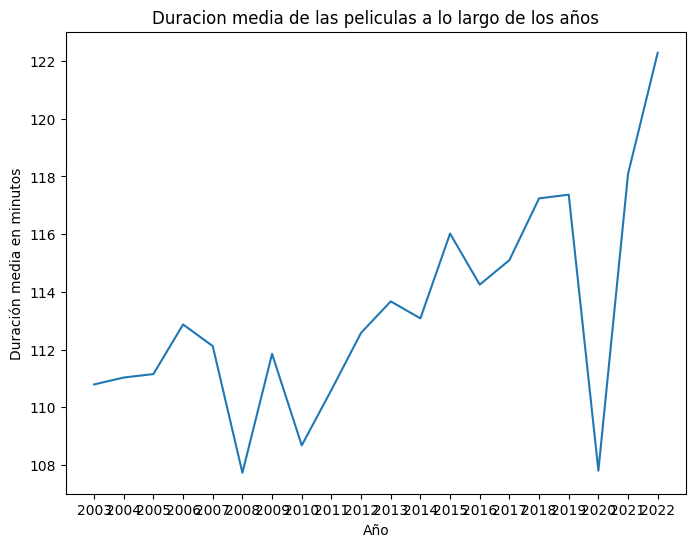

In [358]:
plt.figure(figsize=(8,6))
sns.lineplot(data=duracion_media, x="Year", y="Runtime")
plt.title('Duracion media de las peliculas a lo largo de los años')
plt.ylabel('Duración media en minutos')
plt.xlabel('Año')
plt.xticks(ticks=range(2003,2023,1))
plt.show()
